# 可视化标记比较

比较分割算法时的一个重要第一步是将各个算法的结果可视化并展示它们之间的差异。

In [8]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt
import pandas as pd

仅从可视化图像中，我们可以看到四种比较算法中没有任何一对产生相同的标记图像。

blobs_labels_imagej.tif


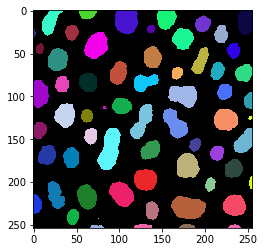

blobs_labels_skimage.tif


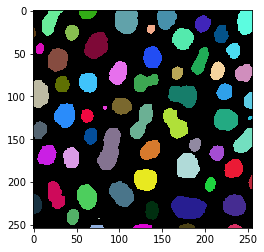

blobs_labels_clesperanto_python.tif


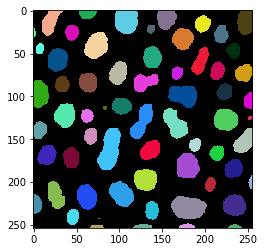

blobs_labels_clesperanto_imagej.tif


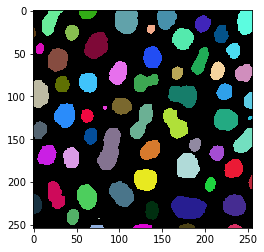

In [12]:
filenames = [
    "blobs_labels_imagej.tif",
    "blobs_labels_skimage.tif",
    "blobs_labels_clesperanto_python.tif",
    "blobs_labels_clesperanto_imagej.tif"
]

for filename in filenames:
    print(filename)
    label_image = imread(filename)
    imshow(label_image, labels=True)

由于在这种可视化中对应的对象具有不同的颜色，我们可以得出结论，至少对象的标签是不同的。我们还不能断定Otsu的阈值方法在给定的实现中是否会产生不同的结果。

## 差异图像
为了看到不同图像之间的重叠，我们将从标记图像生成二值图像，并可视化这些二值图像之间的差异。

我们首先比较ImageJ的结果和scikit-image的结果来演示这个过程。

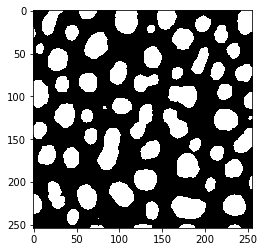

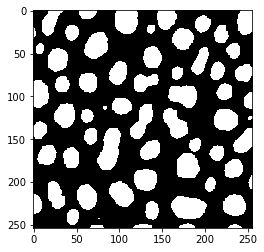

In [18]:
binary_blobs_imagej = imread(filenames[0]) > 0
binary_blobs_skimage = imread(filenames[1]) > 0
imshow(binary_blobs_imagej)
imshow(binary_blobs_skimage)

仔细观察这两幅图像，已经可以看出第二幅图像中的对象稍微大一些。

为了生成`差异`图像，我们将使用[numpy的`logical_xor`方法](https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html)。它会在`差异`图像中将所有像素设置为1，其中两个输入二值图像中有一个是`1`，但不是两个都是。这被称为[异或运算符](https://en.wikipedia.org/wiki/Exclusive_or)。

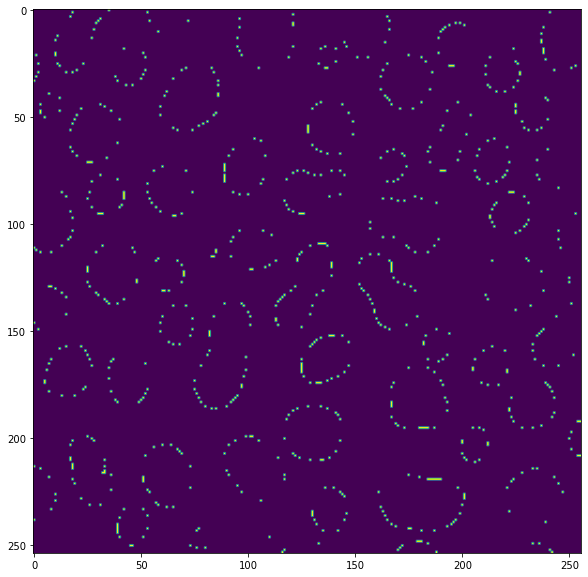

In [19]:
difference = np.logical_xor(binary_blobs_imagej, binary_blobs_skimage)

fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(difference)

从这个二值图像中，我们可以计算这两种方法之间不同的像素数量：

In [20]:
np.sum(difference)

830

## 差异像素计数矩阵
现在我们将编程两个for循环，遍历标记图像对并使用相同的方法比较它们。结果将是一个4x4矩阵，其中包含比较相应算法实现时不同的像素数量。

In [23]:
matrix = {"Algorithms": filenames}

for filename_A in filenames:
    image_A = imread(filename_A)
    measurements = []
    for filename_B in filenames:
        image_B = imread(filename_B)
        
        difference = np.logical_xor(image_A, image_B)
        number_of_different_pixels = np.sum(difference)
        measurements.append(number_of_different_pixels)
    
    matrix[filename_A] = measurements

In [24]:
pd.DataFrame(matrix)

Algorithms  blobs_labels_imagej.tif  \
0              blobs_labels_imagej.tif                        0   
1             blobs_labels_skimage.tif                      830   
2  blobs_labels_clesperanto_python.tif                      830   
3  blobs_labels_clesperanto_imagej.tif                      830   

   blobs_labels_skimage.tif  blobs_labels_clesperanto_python.tif  \
0                       830                                  830   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   

   blobs_labels_clesperanto_imagej.tif  
0                                  830  
1                                    0  
2                                    0  
3                                    0

从这个矩阵中，我们可以得出结论，只有ImageJ的结果与其他三种实现不同。

## 练习
我们还应该快速确认一下，通过查看另一个`差异`图像，例如Jython中的clesperanto实现和Python中的scikit-image之间的差异。可视化这两个二值图像以及它们之间的差异图像。同时计算这两幅图像之间不同的像素数量。